In [7]:
from qiskit import *
from qiskit.visualization import *

In [8]:
old_qc = QuantumCircuit
del QuantumCircuit

# Define some custom custom gates
class QuantumCircuit(old_qc):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.qc = self

    def anti_ccx(self, control_qubit1, control_qubit2, target_qubit1):
        self.barrier(self.qubits)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.ccx(control_qubit1, control_qubit2, target_qubit1)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.barrier(self.qubits)

    def ccxx(self, control_qubit1, control_qubit2, target_qubit1, target_qubit2):
        self.barrier(self.qubits)
        self.ccx(control_qubit1, control_qubit2, target_qubit1)
        self.ccx(control_qubit1, control_qubit2, target_qubit2)
        self.barrier(self.qubits)

    def anti_ccxx(self, control_qubit1, control_qubit2, target_qubit1, target_qubit2):
        self.barrier(self.qubits)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.ccx(control_qubit1, control_qubit2, target_qubit1)
        self.ccx(control_qubit1, control_qubit2, target_qubit2)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.barrier(self.qubits)
    
    def measure_all(self, q = None, c = None):
        if not q:
            q = self.qubits
        if not c:
            c = self.clbits
        n = len(q)
        self.barrier(self.qubits)
        for i in range(n):
            self.measure(q[i], c[n-i-1])

In [9]:
q = QuantumRegister(3, 'motor')
c = ClassicalRegister(3, 'read')
circuit = QuantumCircuit(q, c)

In [10]:
ket_0 = [1, 0]
ket_1 = [0, 1]

# Demonstrating with sensor = |10>  Feel free to try with other 3 states (|00>, |01> and |11>) too.
quantumRead = [ket_0, ket_0]  # Similar to the digitalRead or analogRead functions of Arduino
circuit.initialize(quantumRead[0], [q[0]])
circuit.initialize(quantumRead[1], [q[1]])

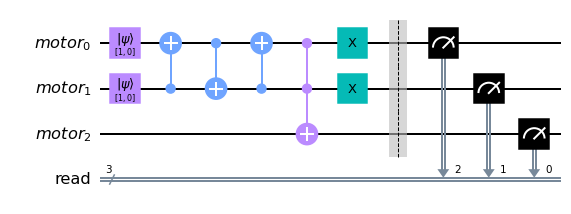

In [11]:
# circuit.h(q[0])
# circuit.h(q[1])

circuit.cx(q[1], q[0])
circuit.cx(q[0], q[1])
circuit.cx(q[1], q[0])
circuit.ccx(q[0], q[1], q[2])
circuit.x(q[0])
circuit.x(q[1])
circuit.measure_all()
circuit.draw(output="mpl")

In [13]:
comp = Aer.get_backend("qasm_simulator")
results = execute(circuit, comp).result()
# plot_histogram(results.get_counts(circuit))
list(results.get_counts(circuit).keys())

['110']